**Business Analytics - Data Exploration and Visualization**

**1. Basic Operations**

In [ ]:
# Load data from csv file

In [33]:
import pandas as pd
import dateutil
# Load data from csv file
data = pd.read_csv('phone_data.csv')

In [34]:
data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [35]:
data.tail()

,index,date,duration,item,month,network,network_type
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world
829,829,14/03/15 00:16,1.000,sms,2015-03,world,world


In [36]:
# Convert date from string to date times

In [37]:
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

In [39]:
data

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [38]:
# How many rows are in the dataset
data.shape

(830, 7)

In [12]:
data['item']

0      data
1      call
2      call
3      call
4      call
       ... 
825     sms
826     sms
827    data
828     sms
829     sms
Name: item, Length: 830, dtype: object

In [13]:
data['item'].count()

830

In [14]:
# How many rows are in the dataset
print(data['item'].count())

830


In [16]:
# What was the longest phone call / data entry?
data['duration'].max()

10528.0

In [17]:
# What was the longest phone call / data entry?
print(data['duration'].max())

10528.0


In [22]:
# How many sms in total?
sms=len(data[data['item']=='sms'])
print(f'The total number of sms: {sms}')

The total number of sms: 292


In [23]:
data[data['item']=='sms'].count()

index           292
date            292
duration        292
item            292
month           292
network         292
network_type    292
dtype: int64

In [ ]:
data[data['item']=='call']['duration'].max()

10528.0

In [ ]:
print("Total (second) for Call = {}".format(data[data['item']=='call']['duration'].sum()))
print("Total (s) for sms = {}".format(data[data['item']=='sms']['duration'].sum()))
print("Total (s) for data = {}".format(data[data['item']=='data']['duration'].sum()))

Total (second) for Call = 92321.0
Total (s) for sms = 292.0
Total (s) for data = 5164.35


In [ ]:
print(data[data['item']=='data']['duration'].max())

34.429


In [ ]:
# How many seconds of phone calls are recorded in total?

In [ ]:
# How many seconds of phone calls are recorded in total?
print(data['duration'][data['item'] == 'call'].sum())

92321.0


In [ ]:
# How many entries are there for each month?

In [ ]:
# How many entries are there for each month?
print(data['month'].value_counts())

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64


In [ ]:
# Number of non-null unique (or different) network entries

In [40]:
# Number of non-null unique (or different) network entries
print(data['network'].nunique())

9


**2. Data Exploration and Visualization using Groupby**





In [ ]:
# Group data by month

In [41]:
data.groupby(['month']).groups

{'2014-11': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             220, 221, 222, 223, 224, 225, 226, 227, 229, 230],
            dtype='int64', length=230),
 '2014-12': Int64Index([228, 231, 232, 233, 234, 235, 236, 237, 238, 239,
             ...
             377, 378, 379, 380, 382, 383, 384, 385, 387, 388],
            dtype='int64', length=157),
 '2015-01': Int64Index([381, 386, 389, 390, 391, 392, 393, 394, 395, 396,
             ...
             583, 584, 585, 587, 588, 589, 590, 591, 592, 593],
            dtype='int64', length=205),
 '2015-02': Int64Index([577, 586, 594, 595, 596, 597, 598, 599, 600, 601,
             ...
             719, 720, 721, 722, 723, 724, 725, 726, 727, 728],
            dtype='int64', length=137),
 '2015-03': Int64Index([729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
             ...
             820, 821, 822, 823, 824, 825, 826, 827, 828, 829],
            dtype='int64', length=101)}

In [ ]:
type(data.groupby(['month']).groups)

pandas.io.formats.printing.PrettyDict

In [42]:
data.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [43]:
data.groupby(['month']).groups.values()

dict_values([Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            220, 221, 222, 223, 224, 225, 226, 227, 229, 230],
           dtype='int64', length=230), Int64Index([228, 231, 232, 233, 234, 235, 236, 237, 238, 239,
            ...
            377, 378, 379, 380, 382, 383, 384, 385, 387, 388],
           dtype='int64', length=157), Int64Index([381, 386, 389, 390, 391, 392, 393, 394, 395, 396,
            ...
            583, 584, 585, 587, 588, 589, 590, 591, 592, 593],
           dtype='int64', length=205), Int64Index([577, 586, 594, 595, 596, 597, 598, 599, 600, 601,
            ...
            719, 720, 721, 722, 723, 724, 725, 726, 727, 728],
           dtype='int64', length=137), Int64Index([729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
            ...
            820, 821, 822, 823, 824, 825, 826, 827, 828, 829],
           dtype='int64', length=101)])

In [44]:
for k, v in data.groupby(['month']).groups.items():
    print("{} : {}".format(k, v))

2014-11 : Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            220, 221, 222, 223, 224, 225, 226, 227, 229, 230],
           dtype='int64', length=230)
2014-12 : Int64Index([228, 231, 232, 233, 234, 235, 236, 237, 238, 239,
            ...
            377, 378, 379, 380, 382, 383, 384, 385, 387, 388],
           dtype='int64', length=157)
2015-01 : Int64Index([381, 386, 389, 390, 391, 392, 393, 394, 395, 396,
            ...
            583, 584, 585, 587, 588, 589, 590, 591, 592, 593],
           dtype='int64', length=205)
2015-02 : Int64Index([577, 586, 594, 595, 596, 597, 598, 599, 600, 601,
            ...
            719, 720, 721, 722, 723, 724, 725, 726, 727, 728],
           dtype='int64', length=137)
2015-03 : Int64Index([729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
            ...
            820, 821, 822, 823, 824, 825, 826, 827, 828, 829],
           dtype='int64', length=101)


In [ ]:
for k in data.groupby(['month']).groups:
    print("{} : {}".format(k, data.groupby(['month']).groups[k]))

2014-11 : Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            220, 221, 222, 223, 224, 225, 226, 227, 229, 230],
           dtype='int64', length=230)
2014-12 : Int64Index([228, 231, 232, 233, 234, 235, 236, 237, 238, 239,
            ...
            377, 378, 379, 380, 382, 383, 384, 385, 387, 388],
           dtype='int64', length=157)
2015-01 : Int64Index([381, 386, 389, 390, 391, 392, 393, 394, 395, 396,
            ...
            583, 584, 585, 587, 588, 589, 590, 591, 592, 593],
           dtype='int64', length=205)
2015-02 : Int64Index([577, 586, 594, 595, 596, 597, 598, 599, 600, 601,
            ...
            719, 720, 721, 722, 723, 724, 725, 726, 727, 728],
           dtype='int64', length=137)
2015-03 : Int64Index([729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
            ...
            820, 821, 822, 823, 824, 825, 826, 827, 828, 829],
           dtype='int64', length=101)


In [45]:
# How many data entry in the group of '2014-11'
len(data.groupby(['month']).groups['2014-11'])

230

In [46]:
data.groupby(['month']).groups['2014-11']

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            220, 221, 222, 223, 224, 225, 226, 227, 229, 230],
           dtype='int64', length=230)

In [47]:
# Get the first entry for each month

In [48]:
data.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [ ]:
len(data.groupby('month').first())

5

In [ ]:
data.groupby('month').first().count()

index           5
date            5
duration        5
item            5
network         5
network_type    5
dtype: int64

In [ ]:
data.groupby('date').first()

,index,duration,item,month,network,network_type
date,,,,,,
2014-10-15 06:58:00,0,34.429,data,2014-11,data,data
2014-10-15 14:46:00,2,23.000,call,2014-11,Meteor,mobile
2014-10-15 14:48:00,3,4.000,call,2014-11,Tesco,mobile
2014-10-15 17:27:00,4,4.000,call,2014-11,Tesco,mobile
2014-10-15 18:55:00,5,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
2015-03-13 00:38:00,825,1.000,sms,2015-03,world,world
2015-03-13 00:39:00,826,1.000,sms,2015-03,Vodafone,mobile
2015-03-13 06:58:00,827,34.429,data,2015-03,data,data


In [ ]:
len(data.groupby('date').first())

747

In [ ]:
# Get the sum of the durations per month

In [49]:
# Get the sum of the durations per month
data.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [ ]:
# Get the number of dates / entries in each month

In [50]:
# Get the number of dates / entries in each month
data.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [51]:
data.groupby('network')['duration'].sum()

network
Meteor        7233.00
Tesco        13841.00
Three        36551.00
Vodafone     14770.00
data          5164.35
landline     18433.00
special          3.00
voicemail     1775.00
world            7.00
Name: duration, dtype: float64

In [ ]:
# What is the sum of durations, for calls only, to each network

In [52]:
data.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [ ]:
# What is the sum of durations, for calls only, to each network
data[data['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [ ]:
# What is the sum of durations, for sms only, to each network

In [53]:
# What is the sum of durations, for sms only, to each network
data[data['item'] == 'sms'].groupby('network'
    )['duration'].sum()

network
Meteor       33.0
Tesco        13.0
Three        87.0
Vodafone    149.0
special       3.0
world         7.0
Name: duration, dtype: float64

In [ ]:
# How many calls, sms, and data entries are in each month?

In [55]:
# How many calls, sms, and data entries are in each month?
data.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

**3. Groupby Output**

In [ ]:
# Data types

In [56]:
# produces Pandas Series
data.groupby('month')['duration'].sum()
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [57]:
# produces Pandas Series
print(type(data.groupby('month')['duration'].sum()))
print(data.groupby('month')['duration'].sum())
# Produces Pandas DataFrame
print(type(data.groupby('month')[['duration']].sum()))
print(data.groupby('month')[['duration']].sum())

<class 'pandas.core.series.Series'>
month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64
<class 'pandas.core.frame.DataFrame'>
          duration
month             
2014-11  26639.441
2014-12  14641.870
2015-01  18223.299
2015-02  15522.299
2015-03  22750.441


In [ ]:
data.groupby('month')[['duration']].sum()['duration'].max()

26639.441000000003

In [ ]:
# produces Pandas Series
data.groupby('month')['duration'].sum() 

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [ ]:
type(data.groupby('month')['duration'].sum())

pandas.core.series.Series

In [58]:
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [ ]:
# Index or not

In [60]:
data.groupby('month', as_index=False).agg({"duration": sum})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [61]:
data.groupby('month', as_index=True).agg({"duration": "sum"})

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [ ]:
# groupby month and item (with plot)

In [62]:
data.groupby(['month', 'item']
).agg(
    {
     'duration': sum,   # Sum duration per group
     'network_type': "count" # get the count of networks
    }
)

duration  network_type
month   item                         
2014-11 call  25547.000           107
        data    998.441            29
        sms      94.000            94
2014-12 call  13561.000            79
        data   1032.870            30
        sms      48.000            48
2015-01 call  17070.000            88
        data   1067.299            31
        sms      86.000            86
2015-02 call  14416.000            67
        data   1067.299            31
        sms      39.000            39
2015-03 call  21727.000            47
        data    998.441            29
        sms      25.000            25

In [ ]:
# groupby month and item (with statistics)

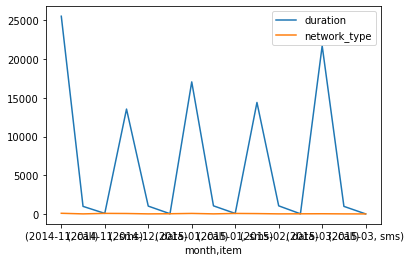

In [63]:
data.groupby(['month', 'item']
).agg(
    {
     'duration': sum,   # Sum duration per group
     'network_type': "count" # get the count of networks
    }
).plot(kind='line')

In [64]:
# Group the data frame by month and item and 
# extract a number of stats from each group
data.groupby(
   ['month', 'item'], as_index=True
).agg(
    Sum_duration = pd.NamedAgg(column='duration',aggfunc=max),    # Sum duration per group
    Network_count = pd.NamedAgg(column='network_type', aggfunc='count'),  # get the count of networks
    First_date = pd.NamedAgg(column='date', aggfunc='first')  # get the first date per group
)

Sum_duration  Network_count          First_date
month   item                                                 
2014-11 call      1940.000            107 2014-10-15 06:58:00
        data        34.429             29 2014-10-15 06:58:00
        sms          1.000             94 2014-10-16 22:18:00
2014-12 call      2120.000             79 2014-11-14 17:24:00
        data        34.429             30 2014-11-13 06:58:00
        sms          1.000             48 2014-11-14 17:28:00
2015-01 call      1859.000             88 2014-12-15 20:03:00
        data        34.429             31 2014-12-13 06:58:00
        sms          1.000             86 2014-12-15 19:56:00
2015-02 call      1863.000             67 2015-01-15 10:36:00
        data        34.429             31 2015-01-13 06:58:00
        sms          1.000             39 2015-01-15 12:23:00
2015-03 call     10528.000             47 2015-02-12 20:15:00
        data        34.429             29 2015-02-13 06:58:00
        sms          1.000             25 2015-02-19 18:46:00

In [ ]:
# groupby month and item (with statistics for each group)

In [ ]:
# Group the data frame by month and item and 
# extract a number of stats from each group
data.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration             ...                date        
                  min        max  ...               first nunique
month   item                      ...                            
2014-11 call    1.000   1940.000  ... 2014-10-15 06:58:00     104
        data   34.429     34.429  ... 2014-10-15 06:58:00      29
        sms     1.000      1.000  ... 2014-10-16 22:18:00      79
2014-12 call    2.000   2120.000  ... 2014-11-14 17:24:00      76
        data   34.429     34.429  ... 2014-11-13 06:58:00      30
        sms     1.000      1.000  ... 2014-11-14 17:28:00      41
2015-01 call    2.000   1859.000  ... 2014-12-15 20:03:00      84
        data   34.429     34.429  ... 2014-12-13 06:58:00      31
        sms     1.000      1.000  ... 2014-12-15 19:56:00      58
2015-02 call    1.000   1863.000  ... 2015-01-15 10:36:00      67
        data   34.429     34.429  ... 2015-01-13 06:58:00      31
        sms     1.000      1.000  ... 2015-01-15 12:23:00      27
2015-03 call    2.000  10528.000  ... 2015-02-12 20:15:00      47
        data   34.429     34.429  ... 2015-02-13 06:58:00      29
        sms     1.000      1.000  ... 2015-02-19 18:46:00      17

[15 rows x 7 columns]

In [ ]:
# call - groupby month (with statistics)

In [65]:
data[data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum)
)

,max_duration,min_duration,total_duration
month,,,
2014-11,1940.0,1.0,25547.0
2014-12,2120.0,2.0,13561.0
2015-01,1859.0,2.0,17070.0
2015-02,1863.0,1.0,14416.0
2015-03,10528.0,2.0,21727.0


In [ ]:
# call - groupby month (with statistics and plots)

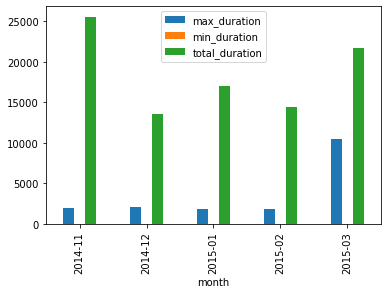

In [66]:
data[data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum)
).plot(kind='bar')